In [1]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

In [16]:
def IESR(t, y, Al, mu,alphaT, alphaR, betaT, betaR, gammaT, gammaR, deltaT, deltaR):
    
    I, Et, Er, St, Sr, R = y
    
    dIdt = Al -alphaT * I * St - alphaR * I * Sr - mu * I
    
    dEtdt = alphaT * I * St - betaT * Et - mu * Et
    dErdt = alphaR * I * Sr - betaR * Er - mu * Er
    
    dStdt = betaT * Et - gammaT * St - deltaT * St * Sr - mu * St
    dSrdt = betaR * Er - gammaR * Sr - deltaR * Sr * St - mu * Sr
    
    dRdt = gammaT * St + deltaT * St * Sr + gammaR * Sr + deltaR * Sr * St - mu * R
    
    return dIdt, dEtdt, dErdt, dStdt, dSrdt, dRdt

In [3]:
def density_evolution(I, Et, Er, St, Sr, R):
    Id, Etd, Erd, Std, Srd, Rd = ([] for i in range(6))
    for i,et,er,st,sr,r in zip(I, Et, Er, St, Sr, R):
        N = i + et + er + st + sr + r
        Id.append(i/N)
        Etd.append(et/N)
        Erd.append(er/N)
        Std.append(st/N)
        Srd.append(sr/N)
        Rd.append(r/N)
    return Id, Etd, Erd, Std, Srd, Rd

In [4]:
def plotseir(t, I, Et, Er, St, Sr, R):
    f, ax = plt.subplots(1,1,figsize=(12,9))
    ax.plot(t, I, 'b', alpha=0.7, linewidth=2, label='Ignorant')
    
    ax.plot(t, Et, 'y', alpha=0.7, linewidth=2, label='Exposed to Truth')
    ax.plot(t, Er, 'y', linestyle = ':', alpha=0.7, linewidth=2, label='Exposed to Rumor')
    
    ax.plot(t, St, 'r', alpha=0.7, linewidth=2, label='Spreader of Truth')
    ax.plot(t, Sr, 'r', linestyle = ':', alpha=0.7, linewidth=2, label='Spreader of Rumor')
    
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Removed')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    ax.margins(0)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

In [12]:
class Parameters():
    '''
    A: the rate at which individuals join the sphere of influence, i.e., the rate at which people
    become susceptible to learning about a piece of information. Rate of increase of followers on socmed?
    mu: the rate at which people leave the sphere of influence.
    
    Alpha (T and R): rate at which the Ignorant compartment becomes Exposed. Analogous to the number of
    people Spreaders can spread information to at each time step. 
    
    Beta (T and R): rate at which Exposed compartment becomes Spreader. Analogous to incubation period
    of a disease, or in terms of information, could be the inverse of how long until someone decides to
    share information after learning about it. Tricky, because in socmed it's so easy to press a share 
    button.
    
    Gamma (T and R): rate at which the Spreader compartment becomes Removed. Analogous to a person recovering
    form a disease, or in terms of information, could be the inverse of how long until someone is no longer
    interested in sharing news. Influenced by how interesting a piece of news is.
    
    Delta (T or R): Interaction rate. The parameter that influences how well people with conflicting ideas
    are able to convince someone with an opposing opinion. 
    '''
    def __init__(self, Al, mu, alphaT, alphaR, betaT, betaR, gammaT, gammaR, deltaT, deltaR):
        self.Al = Al 
        self.mu = mu
        self.alphaT = alphaT
        self.alphaR = alphaR
        self.betaT = betaT
        self.betaR = betaR
        self.gammaT = gammaT
        self.gammaR = gammaR
        self.deltaT = deltaT
        self.deltaR = deltaR
        
    def ret(self):
        return (self.Al, self.mu, 
                self.alphaT, self.alphaR, 
                self.betaT, self.betaR, 
                self.gammaT, self.gammaR, 
                self.deltaT, self.deltaR)

In [13]:
#initial conditions: 
I0, Et0, Er0, St0, Sr0, R0 = 400, 100, 100, 200, 200, 0
N = I0 + Et0 + Er0 + St0 + Sr0+ R0
#parameters: 
params = Parameters(2, 0.25, 0.1, 0.6, 0.3, 0.6, 0.4, 0.15, 0.38, 0.1)

In [17]:
# time points
t = np.linspace(0, 50, 500)

res = solve_ivp(IESR, 
                t_span = (t[0], t[-1]), 
                t_eval = t,
                y0=(I0, Et0, Er0, St0, Sr0, R0),
                args=params.ret())
I, Et, Er, St, Sr, R = density_evolution(*[r for r in res.y])

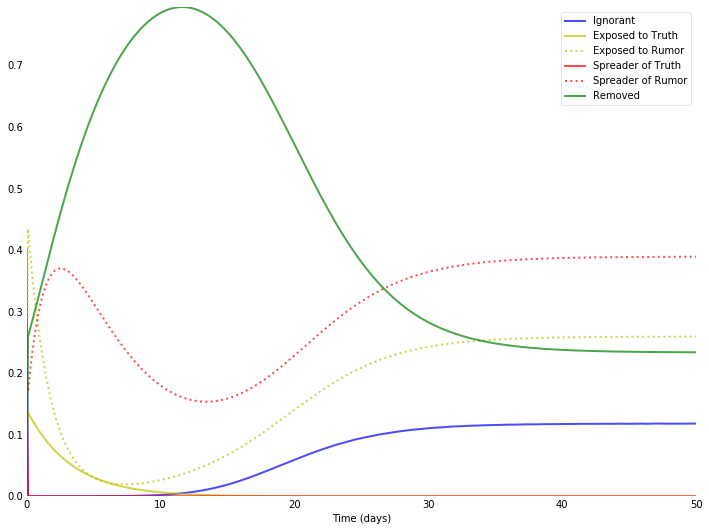

In [18]:
plotseir(t, I, Et, Er, St, Sr, R)